In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from itertools import product

In [2]:
df= pd.read_csv('jj.csv')
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


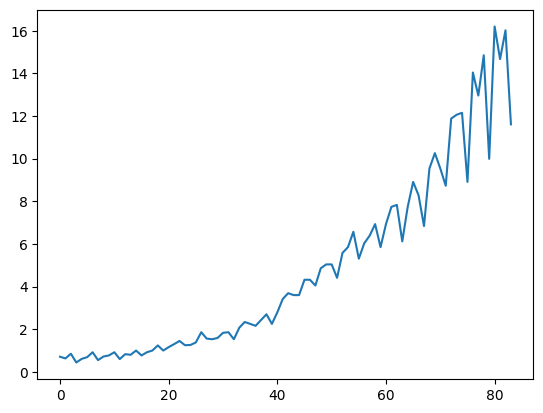

In [3]:
plt.plot(df['data'])

In [4]:
descomposition = STL(df['data'], period = 4).fit()

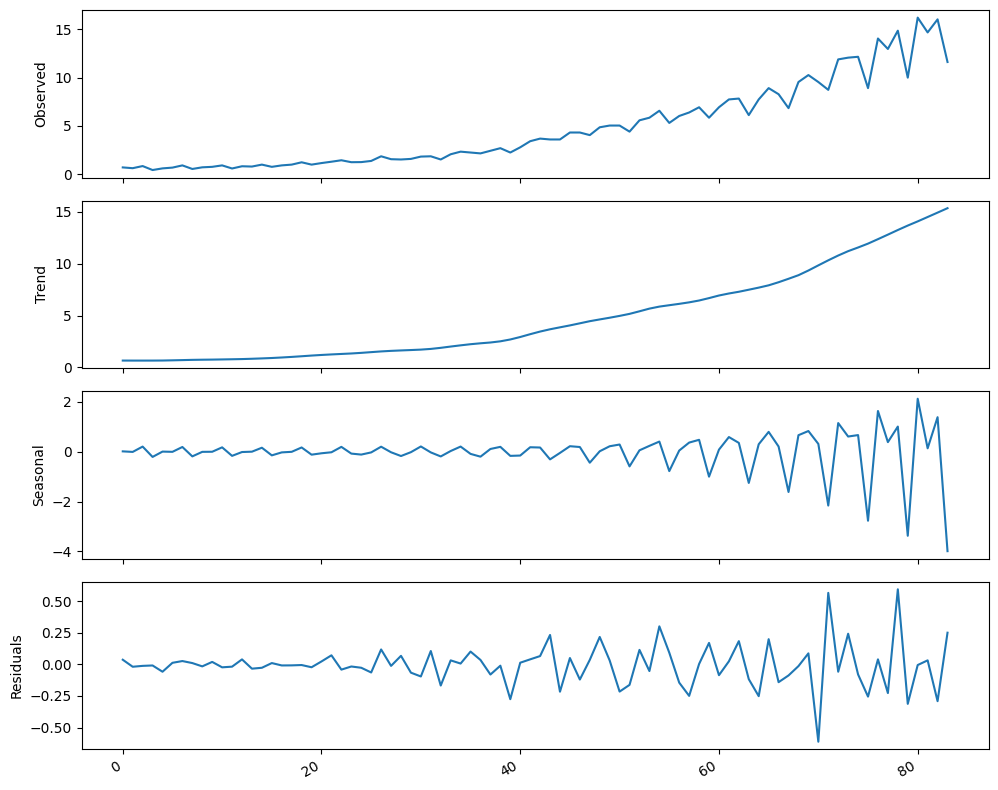

In [5]:
fig,(ax1, ax2,ax3,ax4) = plt.subplots(nrows = 4,ncols=1, sharex= True, figsize= (10,8))

ax1.plot(descomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(descomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(descomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(descomposition.resid)
ax4.set_ylabel('Residuals')

fig.autofmt_xdate()
plt.tight_layout()

# ARIMA and SARIMA training

In [6]:
data = df['data']
train, test = data[:-8], data[-8:]

# Looking for Stationarity

### Stationarity for Arima

In [7]:
fod = np.diff(train,n=1)
adfuller(fod)

(0.22543414826914837,
 0.973652577228976,
 12,
 62,
 {'1%': -3.540522678829176,
  '5%': -2.9094272025108254,
  '10%': -2.5923136524453696},
 73.32473501458625)

In [8]:
sod = np.diff(fod, n= 1)
adfuller(sod)

(-3.665320212236172,
 0.0046282605986696776,
 10,
 63,
 {'1%': -3.5386953618719676,
  '5%': -2.9086446751210775,
  '10%': -2.591896782564878},
 71.28837956586369)

In [9]:
d_Arima = 2

### Stationarity for SARIMA

In [10]:
seasonal_diff = np.diff(fod, n=4)
adfuller(seasonal_diff)

(-7.738801354122505,
 1.0756581383329089e-11,
 10,
 60,
 {'1%': -3.5443688564814813,
  '5%': -2.9110731481481484,
  '10%': -2.5931902777777776},
 115.54178361677435)

In [11]:
d_Sarima, D = 1,1

### ARIMA's training

In [12]:
def optimize_ARIMA(data, parameter_list, d):
    results = []
    for p,q in parameter_list:
        model = SARIMAX(data, order= (p,d,q), simple_differencing=False).fit(disp=False)
        aic = model.aic
        results.append([(p,q), aic])
    df = pd.DataFrame(results)
    df.columns = ['(p,q)', 'AIC']
    return df

In [13]:
ps = range(5)
qs = range(5)
parameter_list = list(product(ps,qs))
aic_df = optimize_ARIMA(train, parameter_list, d_Arima )

/home/miguelpi/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/miguelpi/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/miguelpi/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/miguelpi/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn

In [14]:
aic_df.sort_values('AIC') 

,"(p,q)",AIC
16,"(3, 1)",96.812771
21,"(4, 1)",97.816067
17,"(3, 2)",98.017322
18,"(3, 3)",99.446387
22,"(4, 2)",99.759958
19,"(3, 4)",101.424766
23,"(4, 3)",101.689552
24,"(4, 4)",103.322040
20,"(4, 0)",103.532182
15,"(3, 0)",110.484867


In [15]:
p_Arima, q_Arima =  3,1  

In [16]:
model_ARIMA = SARIMAX(train,order=(p_Arima,d_Arima,q_Arima), simple_differencing=False).fit(disp=False)

/home/miguelpi/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


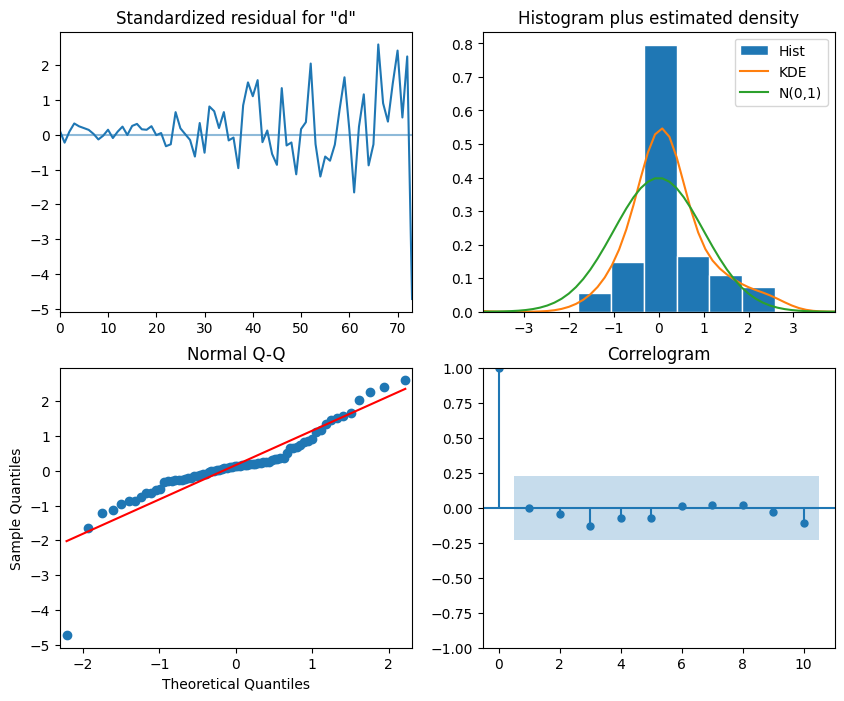

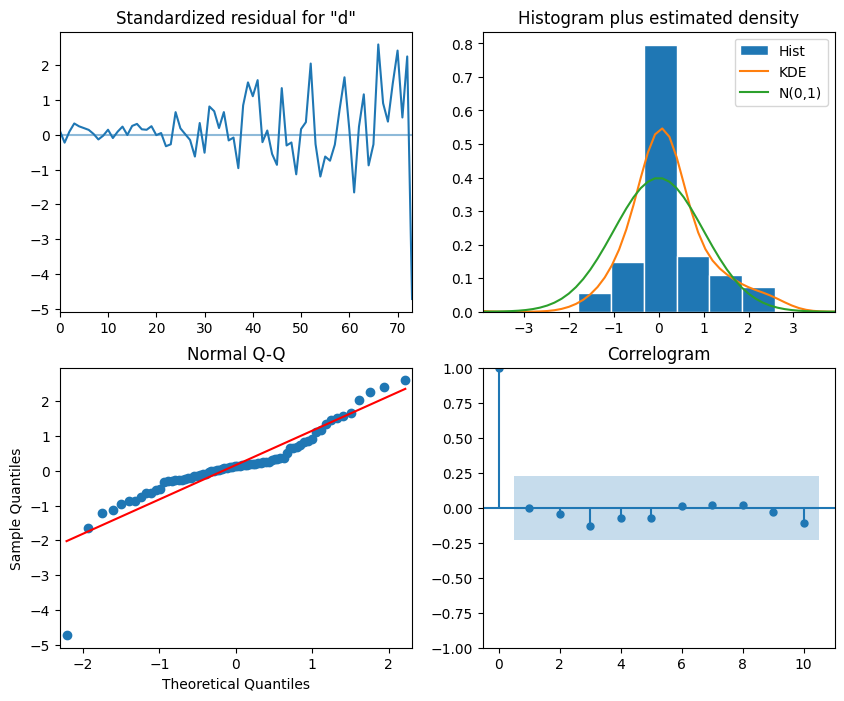

In [17]:
model_ARIMA.plot_diagnostics(figsize = (10,8))

In [18]:
residuals = model_ARIMA.resid

In [19]:
acorr_ljungbox(residuals, range(11))

,lb_stat,lb_pvalue
0,3.844663,NaN
1,0.183434,0.668439
2,0.195204,0.907010
3,1.998344,0.572750
4,2.395853,0.663377
5,2.775050,0.734618
6,2.792072,0.834455
7,2.821827,0.900981
8,2.850268,0.943400
9,2.917713,0.967468


### SARIMA's Training

In [20]:
def optimize_SARIMA(data, parameter_list, d, D, cycle_len):
    results = []
    for p,q,P,Q in parameter_list:
        model = SARIMAX(data, order= (p,d,q),seasonal_order=(P,D,Q, cycle_len), simple_differencing=False).fit(disp=False)
        aic = model.aic
        results.append([(p,q,P,Q), aic])
    df = pd.DataFrame(results)
    df.columns = ['(p,q,P,Q)', 'AIC']
    return df

In [21]:
ps = range(3)
qs = range(3)
Ps = range(3)
Qs = range(3)
parameter_list = list(product(ps, qs, Ps, Qs))
aic_SARIMA_df = optimize_SARIMA(train,parameter_list, d= d_Sarima, D= D, cycle_len=4 )

/home/miguelpi/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/miguelpi/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/miguelpi/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/miguelpi/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

In [22]:
aic_SARIMA_df.sort_values('AIC')

,"(p,q,P,Q)",AIC
17,"(0, 1, 2, 2)",76.830830
44,"(1, 1, 2, 2)",77.550632
26,"(0, 2, 2, 2)",77.808005
14,"(0, 1, 1, 2)",78.110849
9,"(0, 1, 0, 0)",78.390628
...,...,...
2,"(0, 0, 0, 2)",94.263618
1,"(0, 0, 0, 1)",95.385617
6,"(0, 0, 2, 0)",95.537432
3,"(0, 0, 1, 0)",95.685195


In [23]:
p_Sarima,q_Sarima, P, Q = 0,1,2,2

In [24]:
model_SARIMA = SARIMAX(train, order=(p_Sarima,d_Sarima,q_Sarima), seasonal_order=(P,D,Q,4), 
                       simple_differencing=False).fit(disp=False)

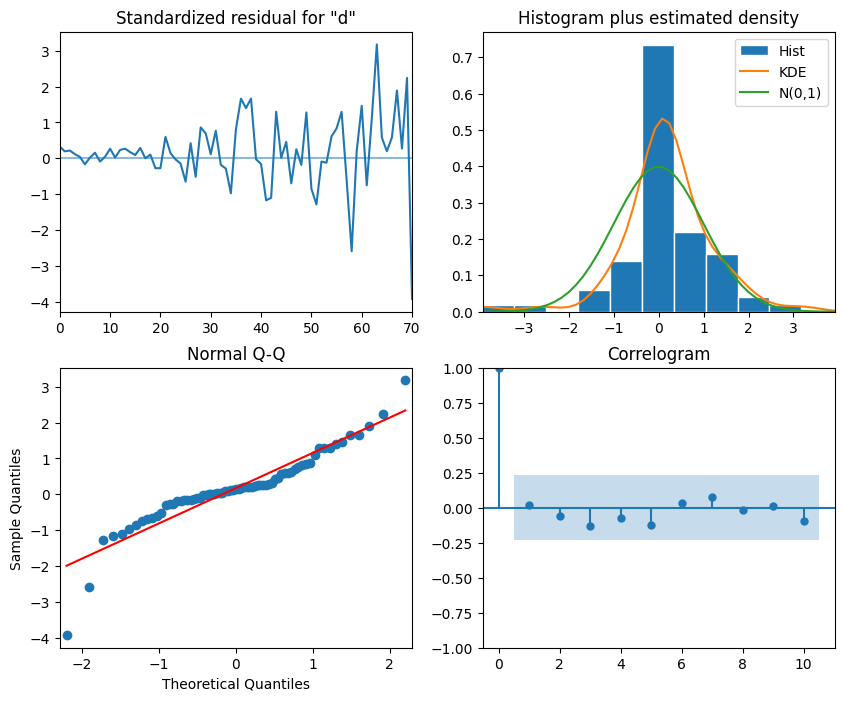

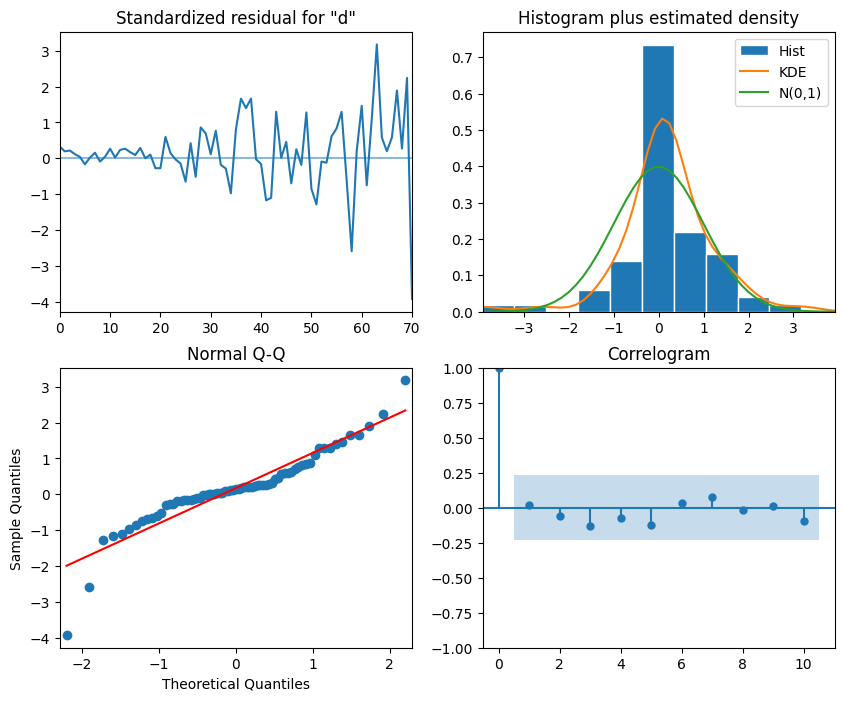

In [25]:
model_SARIMA.plot_diagnostics(figsize=(10,8))

In [26]:
residuals = model_SARIMA.resid
acorr_ljungbox(residuals,range(11))

,lb_stat,lb_pvalue
0,5.346080,NaN
1,0.017549,0.894610
2,0.183127,0.912504
3,2.084008,0.555155
4,2.895440,0.575473
5,3.847076,0.571637
6,3.943481,0.684325
7,4.597053,0.709001
8,4.610941,0.798234
9,4.626453,0.865581


# Comparision

In [27]:
pred_Arima = model_ARIMA.get_prediction(76,83).predicted_mean
pred_Sarima = model_SARIMA.get_prediction(76,83).predicted_mean
pred_naive_seasonal = train[-8:]

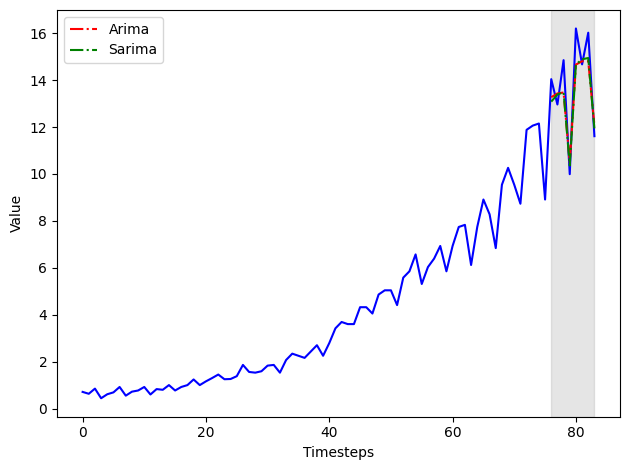

In [28]:
fig, ax = plt.subplots()

ax.plot(df['data'], 'b-')
ax.plot(range(76,84),pred_Arima, 'r-.', label='Arima')
ax.plot(range(76,84),pred_Sarima, 'g-.', label='Sarima')

ax.axvspan(76, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [29]:
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [30]:
mape_ARIMA = mape(test, pred_Arima)
mape_SARIMA = mape(test,pred_Sarima)
mape_naive_seasonal = mape(test.values,pred_naive_seasonal.values)

In [31]:
pred_naive_seasonal

68     9.540000
69    10.260000
70     9.540000
71     8.729999
72    11.880000
73    12.060000
74    12.150000
75     8.910000
Name: data, dtype: float64

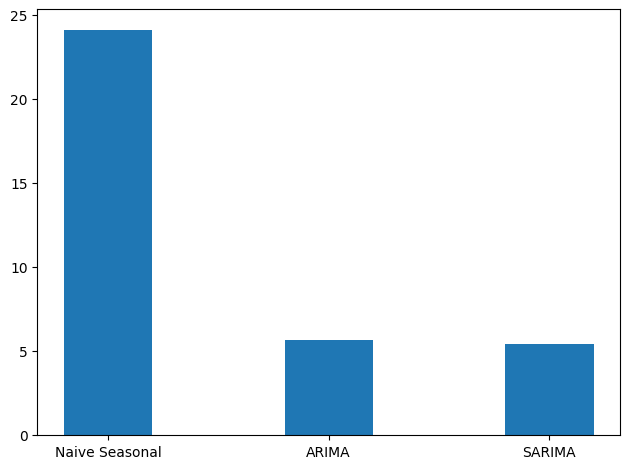

In [32]:
plt.bar( ['Naive Seasonal', 'ARIMA', 'SARIMA'], [mape_naive_seasonal, mape_ARIMA,mape_SARIMA ],  width=0.4)
plt.tight_layout()

In [55]:
mape_naive_seasonal

24.140751099837516